<a href="https://colab.research.google.com/github/nattntn/EfficientNet_Regression_Deeptooth/blob/main/7_23_22_Eff_Regress_Predict_Unfreeze_250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [1]:
import pandas as pd
import numpy as np

In [2]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Clone Efficient

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 36.18 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


# Load model

In [4]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Eff_Regress/22_Re_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [5]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Eff_Regress/22_Re_8e-6_250_Unfreeze.h5')
height = width = model.input_shape[1]

#Prepare Data

In [6]:
train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/table_cut_images/Train_Table_normal.csv')
train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg
...,...,...,...,...,...,...,...
4184,4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J375.jpg
4185,4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J437.jpg
4186,4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J480.jpg
4187,4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J491.jpg


In [7]:
train = train.iloc[:,1:]

In [8]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Normal
/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test


In [9]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Age(year)',
        class_mode = 'raw',
        color_mode= 'rgb',
        target_size=(height, width), # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)

#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 4189 validated image filenames.


In [10]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/table_cut_images/Test.csv')
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg
...,...,...,...,...,...,...,...
938,938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg
939,939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg
940,940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg
941,941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg


In [11]:
test = test.iloc[:,1:]
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg
...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg


# Predict

In [12]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [14]:
predict_image(path[0])[0]

1/1 [==============================] - 1s 1s/step


7.232322

In [15]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    re_prop = np.argmax(predict)
    pred_list.append(result)
    prob_list.append(predict[re_prop])

1/1 [==============================] - 0s 48ms/step


In [16]:
# #Predict
# pred_list = list()
# prob_list = list()
# img_path= path
# for i in range(0,len(img_path)):
#     predict = predict_image(img_path[i])
#     result = predict[0]
#     pred_list.append(result)
#     # prob_list.append(predict[result])

In [17]:
pred_list

[7.232322,
 7.320731,
 7.2987995,
 7.357762,
 7.3048177,
 7.1773996,
 6.8715453,
 6.8526874,
 7.818667,
 7.5247407,
 7.3908224,
 7.6121635,
 6.81697,
 7.0049057,
 7.828441,
 8.167244,
 7.7943244,
 7.8714857,
 6.7797914,
 7.172155,
 7.332814,
 7.524632,
 7.476612,
 7.6776357,
 7.4548526,
 7.329291,
 7.7649293,
 7.4233046,
 7.2781997,
 7.2852087,
 7.244503,
 7.472867,
 7.6962333,
 7.376246,
 7.738288,
 7.4824224,
 7.5074677,
 7.5086217,
 7.297922,
 7.487598,
 7.476207,
 7.054139,
 7.024779,
 7.6217675,
 7.6142144,
 7.2828875,
 7.4892116,
 7.230899,
 7.3539643,
 8.406721,
 8.749123,
 7.806357,
 8.204851,
 8.066463,
 8.667079,
 8.505728,
 8.630364,
 8.01623,
 7.7727485,
 7.9960585,
 8.182819,
 8.168286,
 8.50741,
 9.092766,
 8.760002,
 8.698971,
 8.087509,
 9.266583,
 8.916305,
 8.082972,
 8.248502,
 8.41556,
 8.218752,
 7.8869486,
 7.7210965,
 8.87556,
 8.601145,
 7.672024,
 7.5780725,
 8.87556,
 8.601145,
 7.903975,
 7.8043375,
 8.22437,
 8.192827,
 8.625031,
 8.002394,
 8.494523,
 8.535

In [18]:
print(type(pred_list))

<class 'list'>


In [19]:
pred_int = np.around(pred_list)

In [20]:
test['Predict_float'] = pred_list
test['Predict_int'] = pred_int
# แสดง DataFrame
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,7.232322,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.320731,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,7.298800,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.357762,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,7.304818,7.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,21.553362,22.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,20.872322,21.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,20.123653,20.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,21.293257,21.0


In [21]:
#test.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Eff_Regress/Table_test_Estimate_Age.csv')

# Evaluate (All)

In [22]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(test['Age(year)'].tolist()) # ค่าจริง

In [23]:
pred

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  7.,  8.,  7.,
        7.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,  7.,
        8.,  7.,  7.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,  8.,  8.,  7.,
        7.,  7.,  7.,  7.,  8.,  8.,  7.,  7.,  7.,  7.,  8.,  9.,  8.,
        8.,  8.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,
        9.,  8.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  8.,
        8.,  9.,  9.,  8.,  8.,  8.,  8.,  9.,  8.,  8.,  9.,  9.,  9.,
        8.,  8.,  8., 10., 10.,  9.,  8., 10.,  9., 10., 10.,  8.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  8.,  8.,  9.,  8.,  8.,  9.,  8.,  9.,  9.,  9.,  8.,
        9.,  9.,  9.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9., 10.,  9.,
        9.,  9.,  9.,  9., 10., 10.,  9.,  9., 10.,  9.,  9.,  8., 10.,
        9.,  9.,  8.,  9.,  9., 10., 10., 10.,  9., 10., 10., 10.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9

## confusion_matrix

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 29.90455991516437%
              precision    recall  f1-score   support

           7       1.00      0.68      0.81        50
           8       0.51      0.62      0.56        48
           9       0.39      0.70      0.50        50
          10       0.29      0.31      0.30        49
          11       0.41      0.30      0.34        50
          12       0.36      0.40      0.38        48
          13       0.44      0.46      0.45        50
          14       0.24      0.28      0.26        47
          15       0.23      0.24      0.23        51
          16       0.30      0.28      0.29        50
          17       0.27      0.25      0.26        51
          18       0.23      0.26      0.25        50
          19       0.16      0.27      0.20        49
          20       0.10      0.16      0.12        49
          21       0.19      0.30      0.23        50
          22       0.12      0.12      0.12        50
          23       0.17      0.04      0

Text(0.5, 76.24999999999999, 'Predicted label')

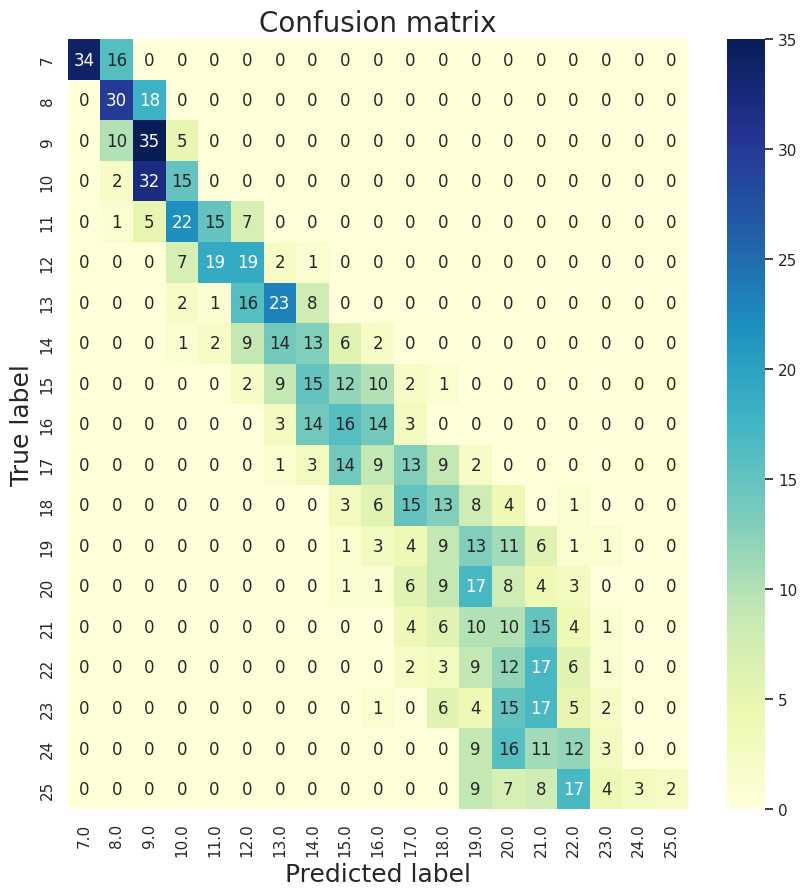

In [25]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.3372216330858961
MSE: 3.591728525980912
RMSE: 1.895185617817134


# Evaluate (7-23)

In [27]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,7.232322,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.320731,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,7.298800,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.357762,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,7.304818,7.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,21.553362,22.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,20.872322,21.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,20.123653,20.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,21.293257,21.0


In [28]:
test7_23y = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 23)]
test7_23y

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,7.232322,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.320731,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,7.298800,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.357762,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,7.304818,7.0
...,...,...,...,...,...,...,...,...
930,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,21.013214,21.0
931,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,20.295805,20.0
932,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,19.703060,20.0
933,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,20.904999,21.0


## confusion_matrix

In [29]:
pred_under = np.array( test7_23y['Predict_int'].tolist()) #แปลงเป็น array
act_under = np.array( test7_23y['Age(year)'].tolist())

In [30]:
pred_under

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  7.,  8.,  7.,
        7.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,  7.,
        8.,  7.,  7.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,  8.,  8.,  7.,
        7.,  7.,  7.,  7.,  8.,  8.,  7.,  7.,  7.,  7.,  8.,  9.,  8.,
        8.,  8.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,
        9.,  8.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  8.,
        8.,  9.,  9.,  8.,  8.,  8.,  8.,  9.,  8.,  8.,  9.,  9.,  9.,
        8.,  8.,  8., 10., 10.,  9.,  8., 10.,  9., 10., 10.,  8.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  8.,  8.,  9.,  8.,  8.,  9.,  8.,  9.,  9.,  9.,  8.,
        9.,  9.,  9.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9., 10.,  9.,
        9.,  9.,  9.,  9., 10., 10.,  9.,  9., 10.,  9.,  9.,  8., 10.,
        9.,  9.,  8.,  9.,  9., 10., 10., 10.,  9., 10., 10., 10.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9

In [31]:
act_under

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_under, pred_under )
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_under, pred_under))#performance

classifier accuracy = 33.2541567695962%
              precision    recall  f1-score   support

           7       1.00      0.68      0.81        50
           8       0.51      0.62      0.56        48
           9       0.39      0.70      0.50        50
          10       0.29      0.31      0.30        49
          11       0.41      0.30      0.34        50
          12       0.36      0.40      0.38        48
          13       0.44      0.46      0.45        50
          14       0.24      0.28      0.26        47
          15       0.23      0.24      0.23        51
          16       0.30      0.28      0.29        50
          17       0.27      0.25      0.26        51
          18       0.23      0.26      0.25        50
          19       0.21      0.27      0.23        49
          20       0.13      0.16      0.15        49
          21       0.25      0.30      0.28        50
          22       0.30      0.12      0.17        50
          23       0.40      0.04      0.

Text(0.5, 76.24999999999999, 'Predicted label')

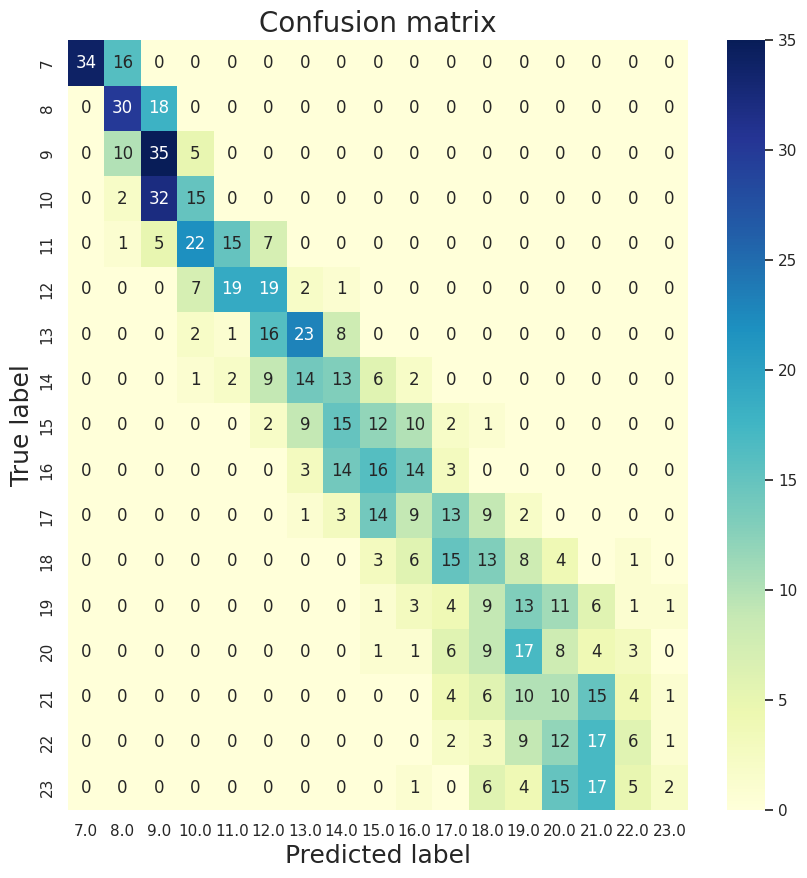

In [33]:
#create CF
data = {'Actual': act_under,'Predicted' : pred_under }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_under, pred_under )

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_under,pred_under)
mse = mean_squared_error(act_under,pred_under)
rmse = mean_squared_error(act_under,pred_under,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.0795724465558194
MSE: 2.324228028503563
RMSE: 1.524541907755757


# Evaluate (7-14)

In [35]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,7.232322,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.320731,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,7.298800,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.357762,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,7.304818,7.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,21.553362,22.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,20.872322,21.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,20.123653,20.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,21.293257,21.0


In [36]:
Under = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 14)]
Under

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,7.232322,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.320731,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,7.298800,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.357762,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,7.304818,7.0
...,...,...,...,...,...,...,...,...
920,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg,11.889950,12.0
921,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg,11.968820,12.0
922,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg,13.835295,14.0
923,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg,13.151023,13.0


## confusion_matrix

In [37]:
pred_under = np.array( Under['Predict_int'].tolist()) #แปลงเป็น array
act_under = np.array( Under['Age(year)'].tolist())

In [38]:
pred_under

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  7.,  8.,  7.,
        7.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,  7.,
        8.,  7.,  7.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,  8.,  8.,  7.,
        7.,  7.,  7.,  7.,  8.,  8.,  7.,  7.,  7.,  7.,  8.,  9.,  8.,
        8.,  8.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,
        9.,  8.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  8.,
        8.,  9.,  9.,  8.,  8.,  8.,  8.,  9.,  8.,  8.,  9.,  9.,  9.,
        8.,  8.,  8., 10., 10.,  9.,  8., 10.,  9., 10., 10.,  8.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  8.,  8.,  9.,  8.,  8.,  9.,  8.,  9.,  9.,  9.,  8.,
        9.,  9.,  9.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9., 10.,  9.,
        9.,  9.,  9.,  9., 10., 10.,  9.,  9., 10.,  9.,  9.,  8., 10.,
        9.,  9.,  8.,  9.,  9., 10., 10., 10.,  9., 10., 10., 10.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9

In [39]:
act_under

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_under, pred_under )
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_under, pred_under))#performance

classifier accuracy = 46.93877551020408%
              precision    recall  f1-score   support

         7.0       1.00      0.68      0.81        50
         8.0       0.51      0.62      0.56        48
         9.0       0.39      0.70      0.50        50
        10.0       0.29      0.31      0.30        49
        11.0       0.41      0.30      0.34        50
        12.0       0.37      0.40      0.38        48
        13.0       0.59      0.46      0.52        50
        14.0       0.59      0.28      0.38        47
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0

    accuracy                           0.47       392
   macro avg       0.41      0.37      0.38       392
weighted avg       0.52      0.47      0.47       392



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

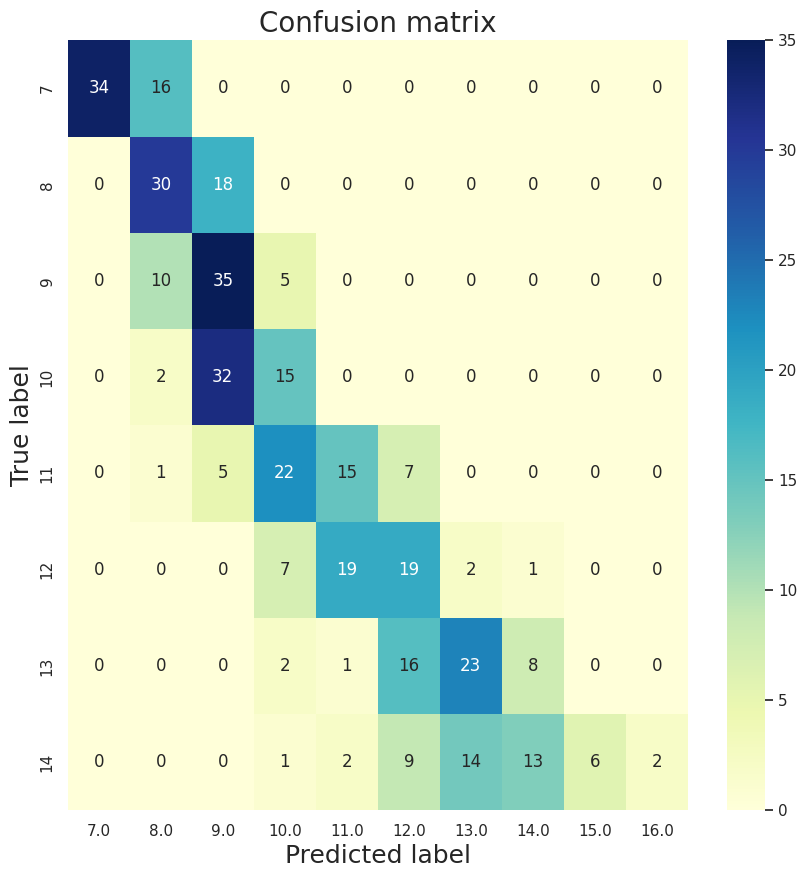

In [41]:
#create CF
data = {'Actual': act_under,'Predicted' : pred_under }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_under, pred_under )

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_under,pred_under)
mse = mean_squared_error(act_under,pred_under)
rmse = mean_squared_error(act_under,pred_under,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.6326530612244898
MSE: 0.8775510204081632
RMSE: 0.9367769320431429


# Evaluate (15-23)

In [43]:
Upper = test[(test['Age(year)'] >= 15) & (test['Age(year)'] <= 23)]
Upper

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
375,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B148.jpg,14.631260,15.0
376,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB148.jpg,14.116590,14.0
377,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B153.jpg,14.620139,15.0
378,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipB153.jpg,14.931792,15.0
379,15,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,B157.jpg,15.150463,15.0
...,...,...,...,...,...,...,...,...
930,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,21.013214,21.0
931,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,20.295805,20.0
932,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,19.703060,20.0
933,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,20.904999,21.0


## confusion_matrix

In [44]:
pred_upper = np.array( Upper['Predict_int'].tolist()) #แปลงเป็น array
act_upper = np.array( Upper['Age(year)'].tolist())

In [45]:
pred_upper

array([15., 14., 15., 15., 15., 15., 14., 14., 15., 16., 16., 16., 16.,
       14., 18., 17., 14., 13., 16., 16., 13., 14., 17., 16., 15., 14.,
       16., 16., 12., 13., 15., 15., 14., 14., 13., 13., 12., 13., 14.,
       14., 13., 14., 14., 15., 13., 15., 13., 14., 15., 14., 16., 15.,
       15., 16., 15., 14., 16., 16., 15., 14., 14., 16., 16., 14., 14.,
       17., 17., 14., 14., 15., 16., 16., 15., 14., 16., 15., 15., 15.,
       15., 14., 15., 16., 16., 16., 14., 15., 16., 17., 16., 16., 15.,
       15., 14., 14., 15., 15., 13., 15., 15., 19., 18., 16., 16., 15.,
       15., 17., 16., 17., 18., 17., 17., 17., 16., 15., 14., 17., 17.,
       15., 15., 14., 16., 18., 17., 16., 16., 16., 16., 17., 18., 18.,
       17., 18., 19., 17., 17., 18., 18., 15., 15., 15., 14., 18., 17.,
       15., 15., 13., 15., 17., 17., 19., 16., 18., 16., 18., 19., 17.,
       18., 22., 18., 19., 18., 20., 17., 20., 19., 18., 17., 17., 18.,
       20., 18., 18., 15., 15., 16., 17., 19., 19., 17., 17., 16

In [46]:
act_upper

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_upper, pred_upper)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_upper, pred_upper))#performance

classifier accuracy = 21.333333333333332%
              precision    recall  f1-score   support

        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.26      0.24      0.24        51
        16.0       0.32      0.28      0.30        50
        17.0       0.27      0.25      0.26        51
        18.0       0.23      0.26      0.25        50
        19.0       0.21      0.27      0.23        49
        20.0       0.13      0.16      0.15        49
        21.0       0.25      0.30      0.28        50
        22.0       0.30      0.12      0.17        50
        23.0       0.40      0.04      0.07        50

    accuracy                           0.21       450
   macro avg       0.20      0.16      0.16       450
weighted avg       0.26      0.21      0.22       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

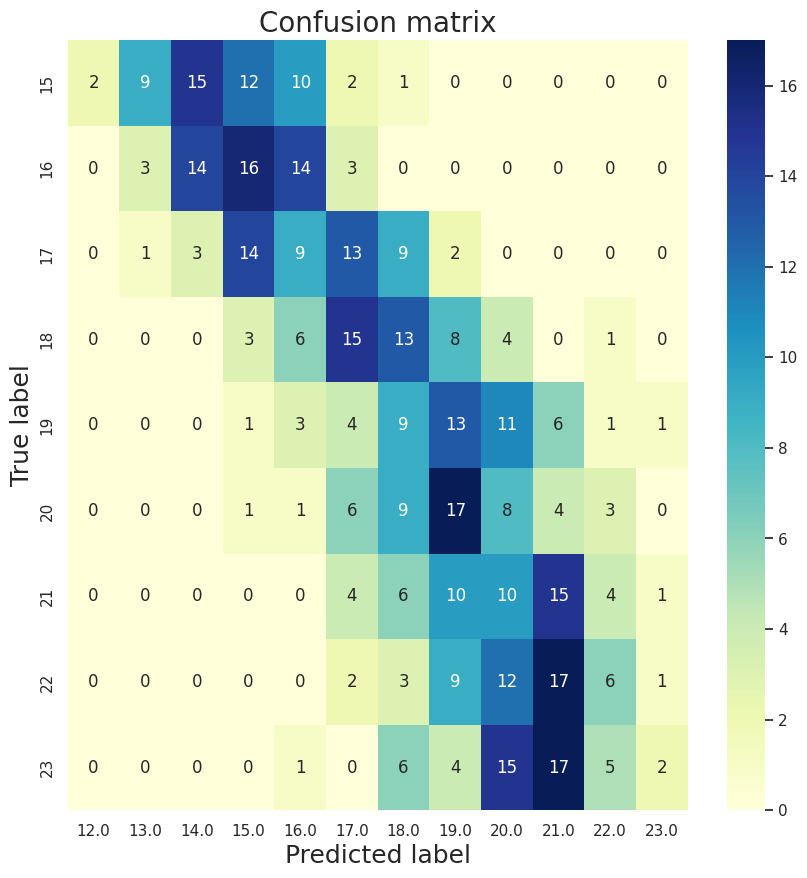

In [48]:
#create CF
data = {'Actual': act_upper,'Predicted' : pred_upper}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_upper, pred_upper)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_upper,pred_upper)
mse = mean_squared_error(act_upper,pred_upper)
rmse = mean_squared_error(act_upper,pred_upper,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.468888888888889
MSE: 3.5844444444444443
RMSE: 1.8932629094883902


# Evaluate Under-Upper

In [50]:
test7_23y

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,7.232322,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.320731,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,7.298800,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.357762,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,7.304818,7.0
...,...,...,...,...,...,...,...,...
930,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,21.013214,21.0
931,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,20.295805,20.0
932,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,19.703060,20.0
933,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,20.904999,21.0


In [51]:
test7_23y.loc[(test7_23y['Age(year)'] >= 7) & (test7_23y['Age(year)'] <= 14), 'age'] = '7 - 14 years'
test7_23y.loc[(test7_23y['Age(year)'] >= 15) & (test7_23y['Age(year)'] <= 23), 'age'] = '15 - 23 years'

<ipython-input-51-6eefa6f42cb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test7_23y.loc[(test7_23y['Age(year)'] >= 7) & (test7_23y['Age(year)'] <= 14), 'age'] = '7 - 14 years'


In [52]:
test7_23y.loc[(test7_23y['Predict_int'] >= 7) & (test7_23y['Predict_int'] <= 14), 'age_pred'] = '7 - 14 years'
test7_23y.loc[(test7_23y['Predict_int'] >= 15) & (test7_23y['Predict_int'] <= 23), 'age_pred'] = '15 - 23 years'

<ipython-input-52-36715b7d4628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test7_23y.loc[(test7_23y['Predict_int'] >= 7) & (test7_23y['Predict_int'] <= 14), 'age_pred'] = '7 - 14 years'


In [53]:
test7_23y

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int,age,age_pred
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,7.232322,7.0,7 - 14 years,7 - 14 years
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.320731,7.0,7 - 14 years,7 - 14 years
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,7.298800,7.0,7 - 14 years,7 - 14 years
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.357762,7.0,7 - 14 years,7 - 14 years
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,7.304818,7.0,7 - 14 years,7 - 14 years
...,...,...,...,...,...,...,...,...,...,...
930,20,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Q49.jpg,21.013214,21.0,15 - 23 years,15 - 23 years
931,20,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipQ412.jpg,20.295805,20.0,15 - 23 years,15 - 23 years
932,21,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipN379.jpg,19.703060,20.0,15 - 23 years,15 - 23 years
933,22,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,U136.jpg,20.904999,21.0,15 - 23 years,15 - 23 years


In [54]:
test7_23y[test7_23y.isna().any(axis=1)]

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int,age,age_pred


## confusion_matrix

In [55]:
pred_age = np.array( test7_23y['age_pred'].tolist()) #แปลงเป็น array
act_age = np.array( test7_23y['age'].tolist())

In [56]:
pred_age

array(['7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
      

In [57]:
act_age

array(['7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
       '7 - 14 years', '7 - 14 years', '7 - 14 years', '7 - 14 years',
      

In [58]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_age, pred_age)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_age, pred_age))#performance

classifier accuracy = 93.46793349168647%
               precision    recall  f1-score   support

15 - 23 years       0.98      0.90      0.94       450
 7 - 14 years       0.89      0.98      0.93       392

     accuracy                           0.93       842
    macro avg       0.94      0.94      0.93       842
 weighted avg       0.94      0.93      0.93       842



Text(0.5, 76.24999999999999, 'Predicted label')

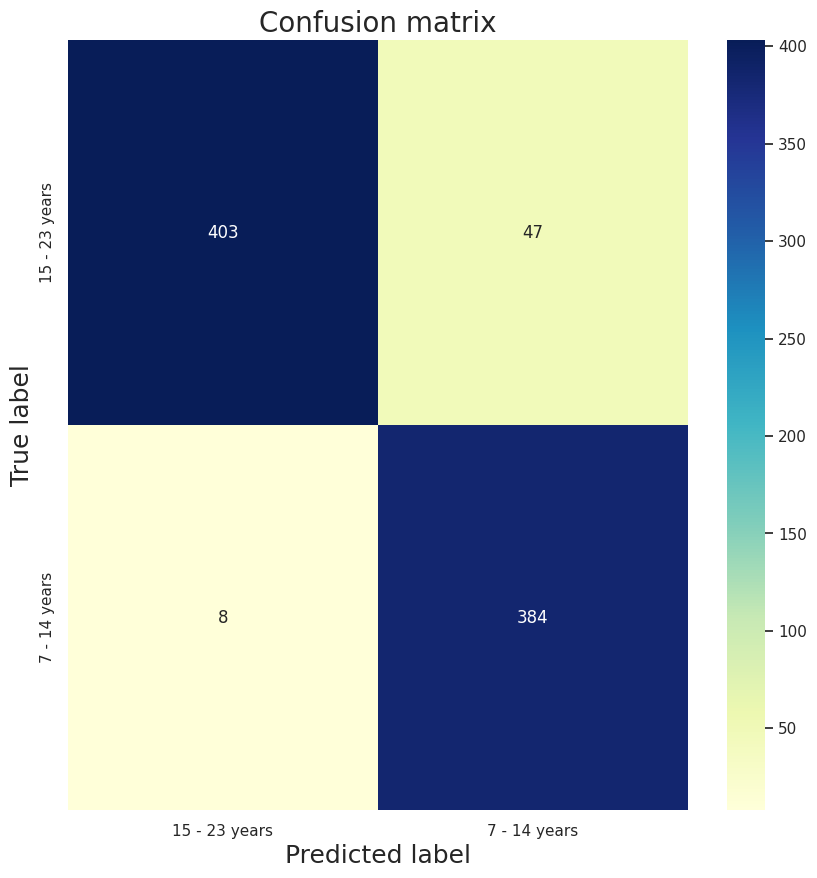

In [59]:
#create CF
data = {'Actual': act_age,'Predicted' : pred_age}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_age, pred_age)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)